In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR as lr_scheduler
import torch.nn as nn
from data import *
from u_net import *
#from u_net_attention import *
from train import *
from inference import *

# 0. Global variables

In [2]:
IMAGE_SIZE = 64
BATCH_SIZE = 24
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Data preparation

In [3]:
celebA_path = "./celebA"
Flowers102_path = "./Flower102"


celebA = torchvision.datasets.CelebA(root = celebA_path, download=True)
Flowers102 = torchvision.datasets.Flowers102(root = Flowers102_path, download=True)

Files already downloaded and verified


In [4]:
transform = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x*2-1)
    ])
Flowers102_with_noise = DataWithNoise(Flowers102, 500, transform)
celeba_with_noise = DataWithNoise(celebA, 500, transform)

In [5]:
dataloader_celebA = DataLoader(celeba_with_noise, batch_size=BATCH_SIZE, shuffle=True)
dataloader_Flower102 = DataLoader(Flowers102_with_noise, batch_size=BATCH_SIZE, shuffle=True)

# 2. Training

## Flower model without attention modul

In [ ]:
lr = 1e-4
lr_ratio = 1e-3

num_epoch = 100
model = Unet(32).to(DEVICE)
optimizer = Adam(model.parameters(), lr=lr, weight_decay=1e-5)
scheduler = lr_scheduler(optimizer, num_epoch, lr*lr_ratio)
train_loader = DataLoader(Flowers102_with_noise, batch_size=BATCH_SIZE, shuffle=True)
#train_loader = DataLoader(celeba_with_noise, batch_size=BATCH_SIZE, shuffle=True)
criterion = nn.MSELoss()
device = DEVICE
batch_size = BATCH_SIZE
model_path = "./flower_model_noattention_1.pt"

In [32]:
train_loop(
    num_epoch,
    model,
    optimizer,
    scheduler,
    train_loader,
    criterion,
    device,
    batch_size,
    model_path
)

100%|██████████| 43/43 [00:09<00:00,  4.62it/s, epoch=24, loss=0.0129]


## Celeb model without attention modul

In [ ]:
lr = 1e-4
lr_ratio = 1e-3

num_epoch = 20
model = Unet(32).to(DEVICE)
optimizer = Adam(model.parameters(), lr=lr, weight_decay=1e-5)
scheduler = lr_scheduler(optimizer, num_epoch, lr*lr_ratio)
#train_loader = DataLoader(Flowers102_with_noise, batch_size=BATCH_SIZE, shuffle=True)
train_loader = DataLoader(celeba_with_noise, batch_size=BATCH_SIZE, shuffle=True)
criterion = nn.MSELoss()
device = DEVICE
batch_size = BATCH_SIZE
model_path = "./celeb_model_noattention1.pt"

In [105]:
train_loop(
    num_epoch,
    model,
    optimizer,
    scheduler,
    train_loader,
    criterion,
    device,
    batch_size,
    model_path
)

100%|██████████| 6783/6783 [18:59<00:00,  5.95it/s, epoch=19, loss=0.00604]


## Flower model with attention modul

In [23]:
lr = 1e-4
lr_ratio = 1e-3

num_epoch = 100
model = AttentionUnet(32).to(DEVICE)
optimizer = Adam(model.parameters(), lr=lr, weight_decay=1e-5)
scheduler = lr_scheduler(optimizer, num_epoch, lr*lr_ratio)
train_loader = DataLoader(Flowers102_with_noise, batch_size=BATCH_SIZE, shuffle=True)
#train_loader = DataLoader(celeba_with_noise, batch_size=BATCH_SIZE, shuffle=True)
criterion = nn.MSELoss()
device = DEVICE
batch_size = BATCH_SIZE
model_path = "./flower_model_attention.pt"

In [24]:
train_loop(
    num_epoch,
    model,
    optimizer,
    scheduler,
    train_loader,
    criterion,
    device,
    batch_size,
    model_path
)

100%|██████████| 43/43 [00:11<00:00,  3.63it/s, epoch=99, loss=0.0102] 


## Celeb model with attention modul

In [52]:
lr = 1e-4
lr_ratio = 1e-3

num_epoch = 20
model = AttentionUnet(32).to(DEVICE)
optimizer = Adam(model.parameters(), lr=lr, weight_decay=1e-5)
scheduler = lr_scheduler(optimizer, num_epoch, lr*lr_ratio)
#train_loader = DataLoader(Flowers102_with_noise, batch_size=BATCH_SIZE, shuffle=True)
train_loader = DataLoader(celeba_with_noise, batch_size=BATCH_SIZE, shuffle=True)
criterion = nn.MSELoss()
device = DEVICE
batch_size = BATCH_SIZE
model_path = "./celeb_model_attention.pt"

In [53]:
train_loop(
    num_epoch,
    model,
    optimizer,
    scheduler,
    train_loader,
    criterion,
    device,
    batch_size,
    model_path
)

100%|██████████| 6783/6783 [20:36<00:00,  5.49it/s, epoch=19, loss=0.00576]


# 3. Inference

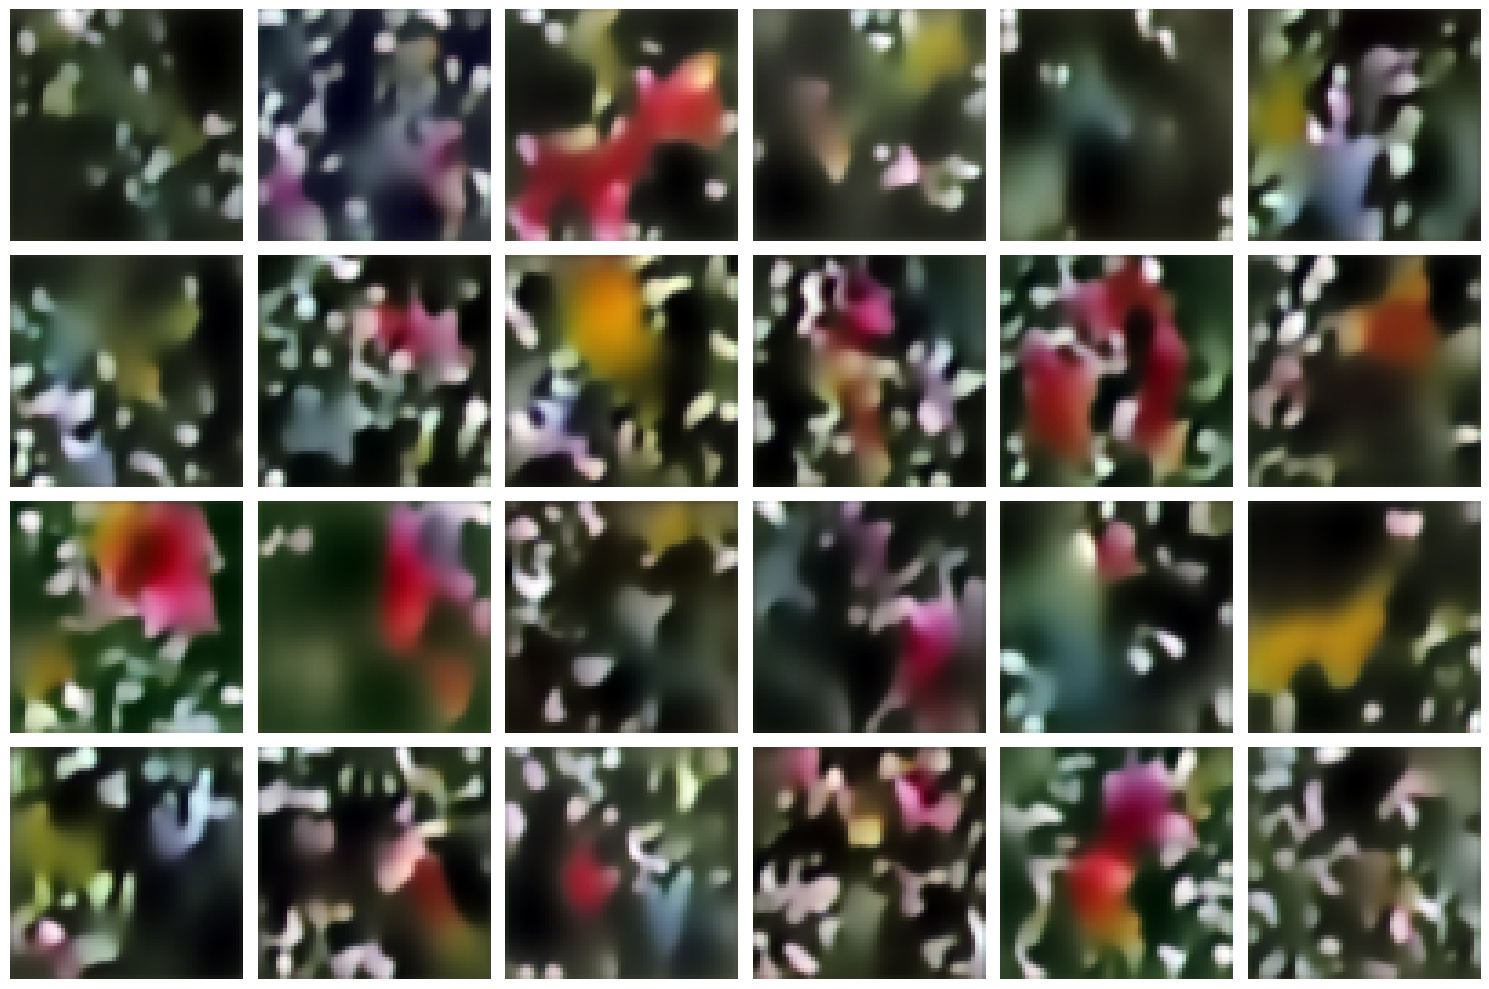

In [6]:
model_path = "./flower_model_noattention.pt"
model = Unet(32)
model.load_state_dict(torch.load(model_path, weights_only=True))
generate_show_images(model, DEVICE, IMAGE_SIZE)

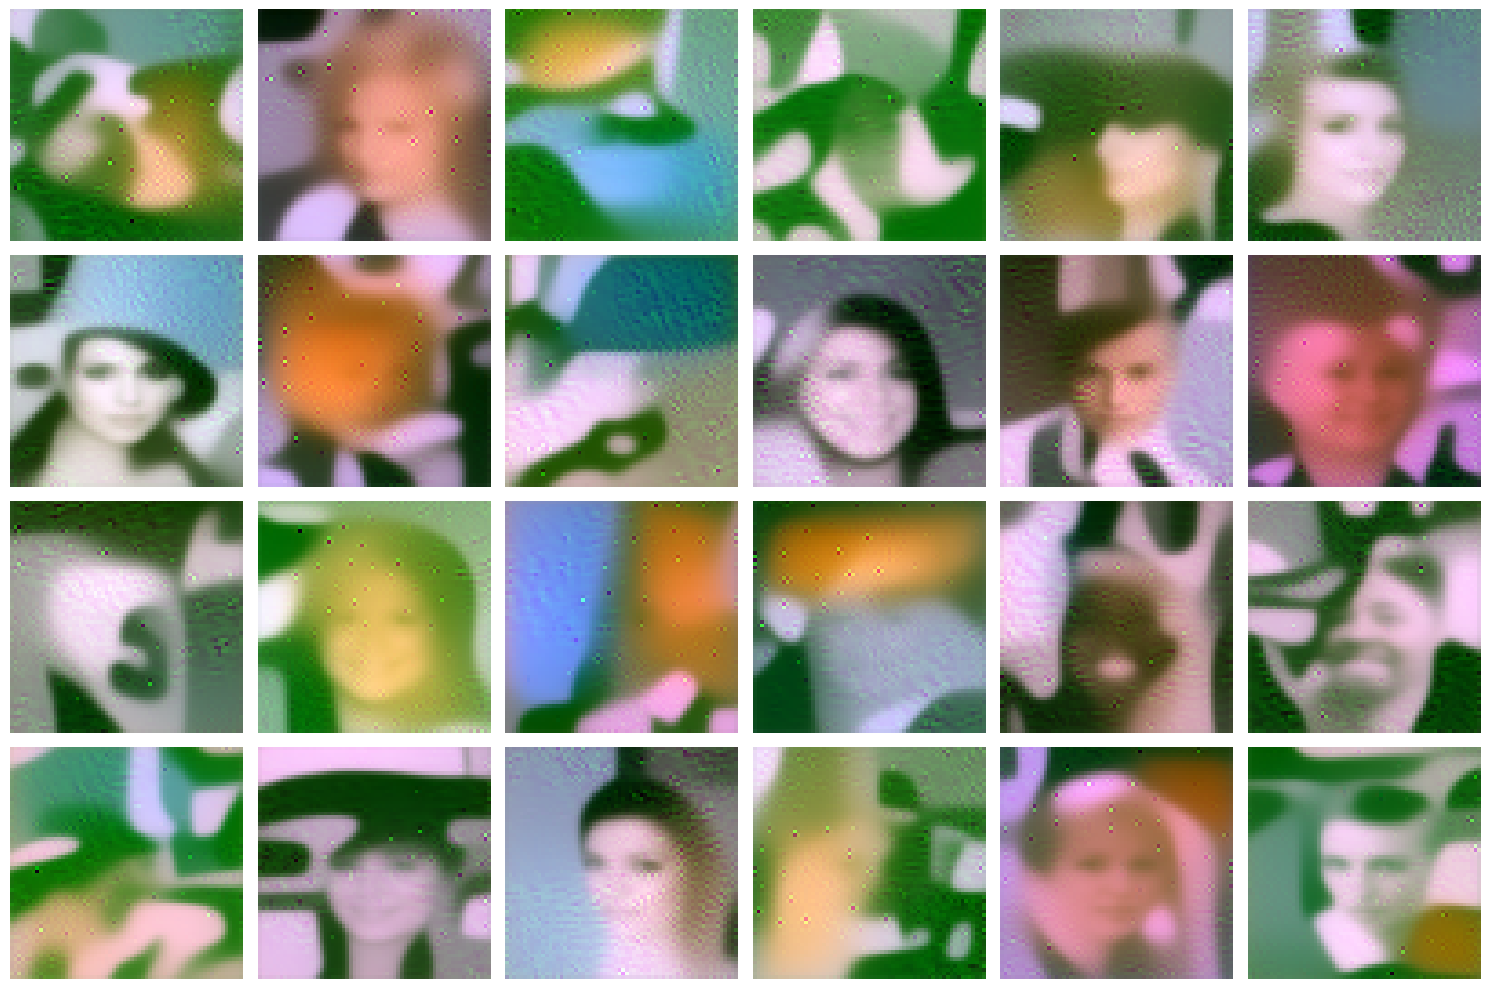

In [7]:
model_path = "./celeb_model_noattention.pt"
model = Unet(32)
model.load_state_dict(torch.load(model_path, weights_only=True))
generate_show_images(model, DEVICE, IMAGE_SIZE)

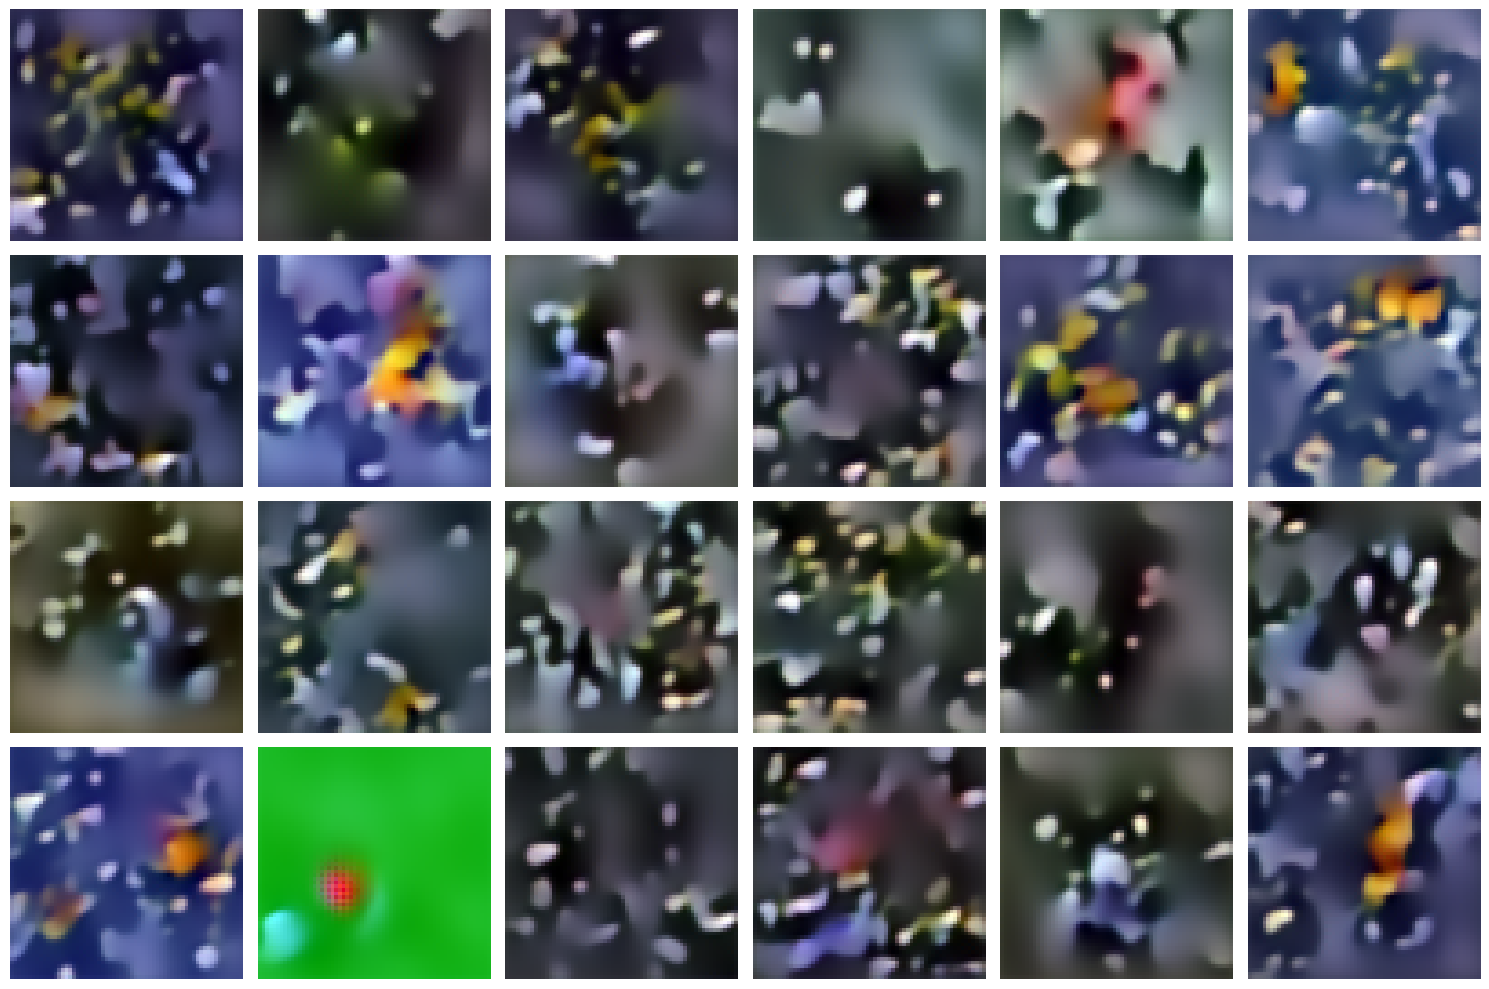

In [8]:
model_path = "./flower_model_attention.pt"
model = AttentionUnet(32)
model.load_state_dict(torch.load(model_path, weights_only=True))
generate_show_images(model, DEVICE, IMAGE_SIZE)

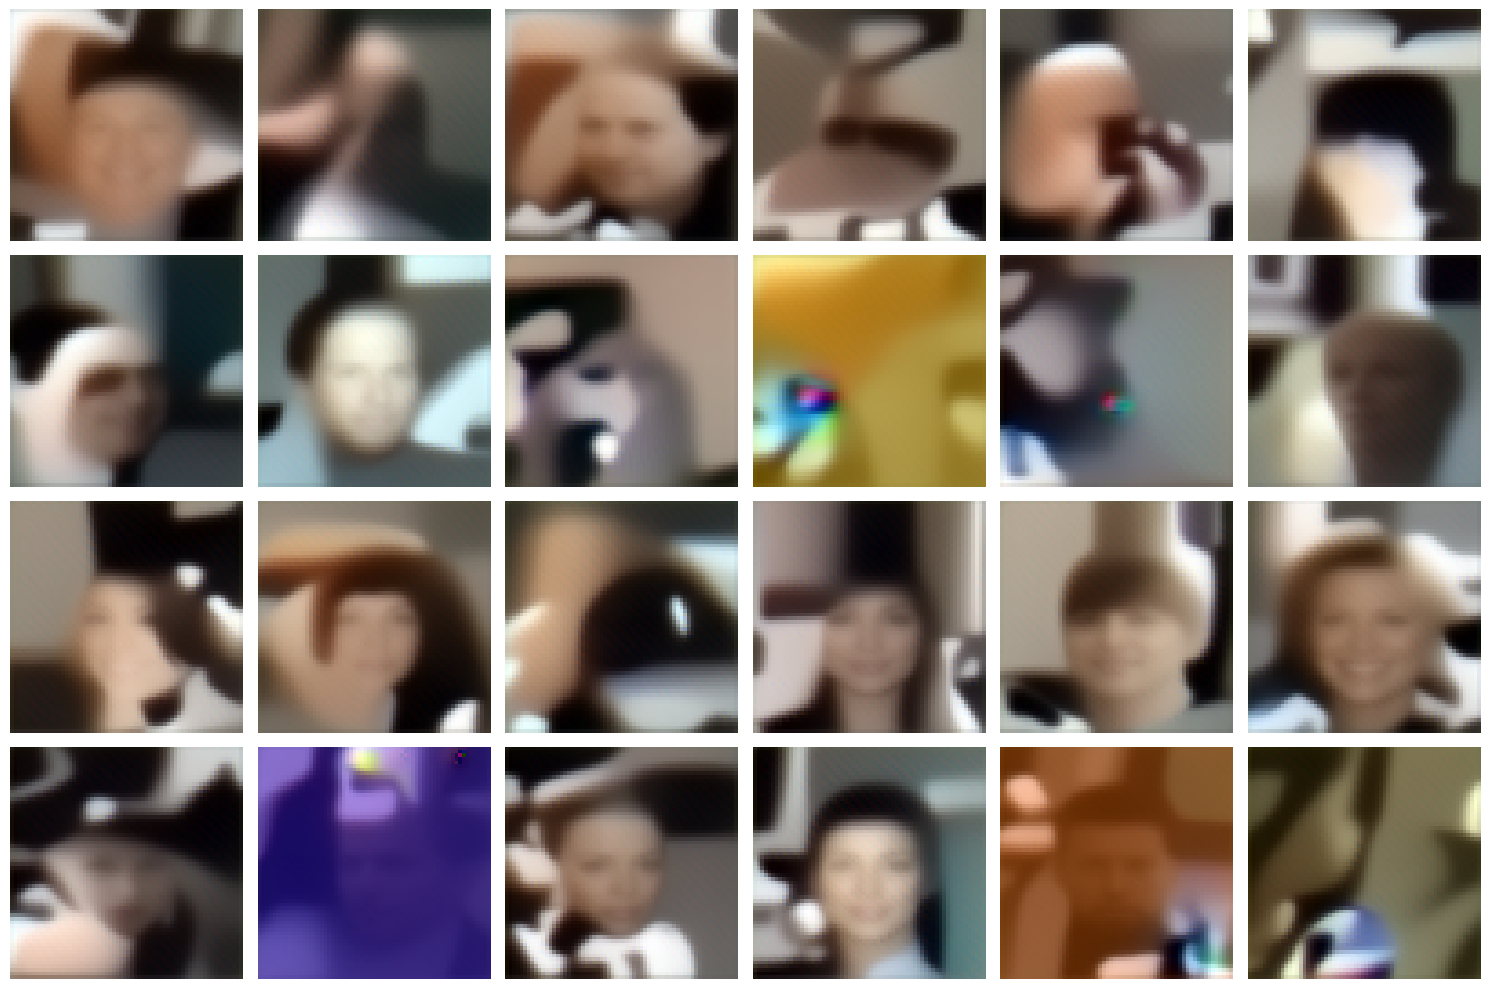

In [9]:
model_path = "./celeb_model_attention.pt"
model = AttentionUnet(32)
model.load_state_dict(torch.load(model_path, weights_only=True))
generate_show_images(model, DEVICE, IMAGE_SIZE)